<a href="https://colab.research.google.com/github/JuanCervigon/master2025/blob/main/PCAyFA_Jugadores_Ficticios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simular datos



Se simula un dataset en el que los individuos son jugadores futbol y las variables son:


* peso, kg
* altura, cm
* ganancias, k euros
* partidos internacionales jugados, # convocatorias
* seguidores en redes sociales, k seguidores

El dataset está generado por un vector aleatorio normal de dimensión 5 con medias y correlaciones definidas por el usuario

El objetivo de este dataset es aplicar las técnicas de reducción de la dimensión de Componentes Principales y Análisis Factorial

Se asume que las variables Peso y Altura están muy correlacionadas y que son independientes del resto de variables. Por otra parte, el resto de variables también están correlacionadas entre sí.


In [1]:
# Importar librerías
import numpy as np
import pandas as pd


In [2]:
# Generar el dataset (variables, n, medias, covarancias, X)

# Nombre de las variables
variables=['Peso','Altura','Ganancias', 'Partidos','Seguidores']

# n = numero de jugadores (individuos)
n = 2000

# Medias y desviaciones típicas de las variables
# peso (kg), altura (cm), ganancias (millones euros), partidos (número de partidos), seguidores (miles)

medias = [70, 170, 2, 40, 1000]
dt = [20, 30, 100, 20, 200]

# Matriz de Correlaciones y covarianzas
correlaciones = np.array([
    [  1.00,  0.86,  0.00,  0.00,  0.00],
    [  0.86,  1.00,  0.00,  0.00,  0.00],
    [  0.00,  0.00,  1.00,  0.70,  0.60],
    [  0.00,  0.00,  0.70,  1.00,  0.65],
    [  0.00,  0.00,  0.60,  0.65,  1.00]])

covarianzas = correlaciones * np.outer(dt, dt)

# Generar el dataset
np.random.seed(4)

X =np.random.multivariate_normal(medias,covarianzas,size=n)
df = pd.DataFrame(X,columns=variables)

In [3]:
print(covarianzas)

[[  400.   516.     0.     0.     0.]
 [  516.   900.     0.     0.     0.]
 [    0.     0. 10000.  1400. 12000.]
 [    0.     0.  1400.   400.  2600.]
 [    0.     0. 12000.  2600. 40000.]]


In [4]:
  # Comprobar si una matriz es definida positiva
  try:
    np.linalg.cholesky(covarianzas)
    print("La matriz SI es positiva definida.")
  except np.linalg.LinAlgError:
    print("La matriz NO es positiva definida.")

La matriz SI es positiva definida.


In [5]:
# Calcular el vector de medias y las matrices de covarianzas correlaciones de X

# Vector de medias
medias_x = np.mean(X, axis=0)
print("Medias de X:", np.round(medias_x,2))

# Martiz de Covarianzas
covarianzas_x = np.cov(X, rowvar=False)
print("\nMatriz de Covarianzas de X:\n", np.round(covarianzas_x, 2))

# Matriz de Correlaciones
correlaciones_x = np.corrcoef(X, rowvar=False)
print("\nMatriz de Correlaciones de X:\n", np.round(correlaciones_x, 2))


Medias de X: [ 69.79 169.48   1.5   39.8  997.27]

Matriz de Covarianzas de X:
 [[ 4.124900e+02  5.299000e+02  2.625000e+01  5.200000e-01  3.930000e+00]
 [ 5.299000e+02  9.113700e+02  1.422000e+01 -5.900000e-01  7.166000e+01]
 [ 2.625000e+01  1.422000e+01  9.644610e+03  1.403920e+03  1.140418e+04]
 [ 5.200000e-01 -5.900000e-01  1.403920e+03  3.970400e+02  2.495360e+03]
 [ 3.930000e+00  7.166000e+01  1.140418e+04  2.495360e+03  3.901864e+04]]

Matriz de Correlaciones de X:
 [[ 1.    0.86  0.01  0.    0.  ]
 [ 0.86  1.    0.   -0.    0.01]
 [ 0.01  0.    1.    0.72  0.59]
 [ 0.   -0.    0.72  1.    0.63]
 [ 0.    0.01  0.59  0.63  1.  ]]


Vector de medias de las variables 
              Media
Peso         69.79
Altura      169.48
Ganancias     1.50
Partidos     39.80
Seguidores  997.27 
 
Matriz de covarianzas de las variables 
               Peso  Altura  Ganancias  Partidos  Seguidores
Peso        412.49  529.90      26.25      0.52        3.93
Altura      529.90  911.37      14.22     -0.59       71.66
Ganancias    26.25   14.22    9644.61   1403.92    11404.18
Partidos      0.52   -0.59    1403.92    397.04     2495.36
Seguidores    3.93   71.66   11404.18   2495.36    39018.64 
 



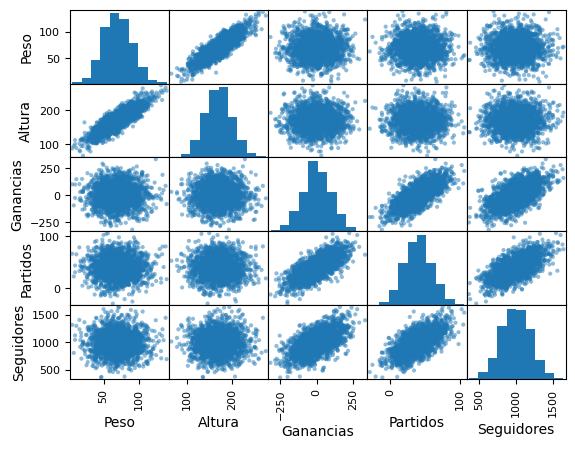

In [6]:
# Pasar a DataFrame las medias y las matrices de covarianzas y correlaciones de X
df_medias_x = pd.DataFrame(medias_x, index=variables, columns=['Media'])
df_covarianzas_x = pd.DataFrame(covarianzas_x, index=variables, columns=variables)
df_correlaciones_x = pd.DataFrame(correlaciones_x, index=variables, columns=variables)

# Imprimir los DataFrames
print('Vector de medias de las variables \n',np.round(df_medias_x,2) ,'\n','\n'
   'Matriz de covarianzas de las variables \n',np.round(df_covarianzas_x,2),'\n','\n')

# Hacer un gráfico cruzando todas las variables
pd.plotting.scatter_matrix(df);

## Estandarizar datos



In [7]:
# Transformar los datos
from sklearn.preprocessing import StandardScaler
estandarizar = StandardScaler()
X_std = estandarizar.fit_transform(df)

# Convertir array de Numpy en un DataFrame de Pandas
df_std=pd.DataFrame(X_std,columns=variables)
df_std

,Peso,Altura,Ganancias,Partidos,Seguidores
0,1.073916,0.930906,-0.404655,0.269375,0.026316
1,-0.118260,-0.747166,1.599194,1.536214,1.520531
2,0.043863,-0.578227,-0.374529,-0.179705,-0.619760
3,-1.421848,-1.494650,0.189168,0.423011,-0.419163
4,-0.948375,0.202786,0.679589,-0.103820,1.011000
...,...,...,...,...,...
1995,-0.543794,-0.088695,0.289659,-0.511312,0.028346
1996,0.634909,0.215687,-0.180198,-0.958139,-1.209079
1997,-0.945209,-1.132304,1.359929,0.369016,-0.178924
1998,-1.371865,-1.126017,-1.123029,-0.258082,-1.216028


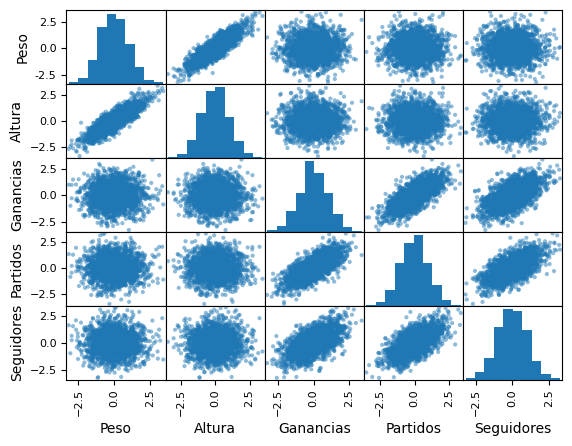

In [8]:
# Hacer un gráfico cruzando todas las variables
pd.plotting.scatter_matrix(df_std);

# Analisis de Componentes Principales, PCA con sklearn

In [9]:
# Librerías necesarias Sklearn
from sklearn.decomposition import PCA

# Calculo de las componentes principales
pca = PCA()
resultado = pca.fit_transform(X_std)


In [10]:
# Calculo de los vectores propios
V = pca.components_.T # Ojo, los vectores propios hay que transponerlos para ponerlos por columnas
df_eigenvectors = pd.DataFrame(V, columns=['v1','v2','v3','v4','v5'])
df_eigenvectors

,v1,v2,v3,v4,v5
0,0.020740,0.706791,-0.024193,-0.002174,0.706701
1,0.020699,0.706791,0.023317,0.010427,-0.706658
2,0.581490,-0.013698,-0.516171,-0.628269,-0.022970
3,0.594029,-0.022021,-0.257407,0.761828,-0.001878
4,0.555104,-0.014849,0.816199,-0.157424,0.026017


In [11]:
# Calculo de los valores propios
eigenvalues = pca.explained_variance_
L = np.diag(eigenvalues)
df_eigenvalues = pd.DataFrame(L,columns=['l1','l2','l3','l4','l5'])
df_eigenvalues

,l1,l2,l3,l4,l5
0,2.295897,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.864872,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.428808,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.277453,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.135471


In [12]:
# Calculo de los scores
Y = pca.transform(X_std)
df_scores = pd.DataFrame(Y, columns=['C1','C2','C3','C4','C5'])
df_scores

,C1,C2,C3,C4,C5
0,-0.019137,1.416210,0.156736,0.462678,0.110579
1,2.668605,-0.689987,0.005605,-0.081294,0.444358
2,-0.679625,-0.359393,-0.280813,0.189841,0.432423
3,0.068174,-2.067036,-0.549101,0.256907,0.035340
4,0.879240,-0.549010,0.528789,-0.661037,-0.802629
...,...,...,...,...,...
1995,-0.132679,-0.440167,0.016326,-0.575721,-0.326579
1996,-1.327477,0.642714,-0.657535,-0.425518,0.270756
1997,0.867629,-1.492465,-0.946515,-0.554859,0.095586
1998,-1.533120,-1.726357,-0.339479,0.691625,-0.179147


In [13]:
# Calculo de la matriz S de correlaciones de X
S = X_std.T@X_std/n
print(np.round(S,2))

[[ 1.    0.86  0.01  0.    0.  ]
 [ 0.86  1.    0.   -0.    0.01]
 [ 0.01  0.    1.    0.72  0.59]
 [ 0.   -0.    0.72  1.    0.63]
 [ 0.    0.01  0.59  0.63  1.  ]]


In [14]:
# Covarianzas de X,Y. Cov(X,Y) = X'·Y/n = S·V = V·L
print(np.round(X_std.T@Y/n,2))
print('\n',np.round((S@V),2))
print('\n',np.round((V@L),2))

[[ 0.05  1.32 -0.01 -0.    0.1 ]
 [ 0.05  1.32  0.01  0.   -0.1 ]
 [ 1.33 -0.03 -0.22 -0.17 -0.  ]
 [ 1.36 -0.04 -0.11  0.21 -0.  ]
 [ 1.27 -0.03  0.35 -0.04  0.  ]]

 [[ 0.05  1.32 -0.01 -0.    0.1 ]
 [ 0.05  1.32  0.01  0.   -0.1 ]
 [ 1.33 -0.03 -0.22 -0.17 -0.  ]
 [ 1.36 -0.04 -0.11  0.21 -0.  ]
 [ 1.27 -0.03  0.35 -0.04  0.  ]]

 [[ 0.05  1.32 -0.01 -0.    0.1 ]
 [ 0.05  1.32  0.01  0.   -0.1 ]
 [ 1.34 -0.03 -0.22 -0.17 -0.  ]
 [ 1.36 -0.04 -0.11  0.21 -0.  ]
 [ 1.27 -0.03  0.35 -0.04  0.  ]]


In [15]:
# Correlaciones de X,Y. Corr(X,Y) = Cov(X,Y)/raiz(L) = V·raiz(L)
print(np.round((S@V@np.linalg.inv(np.sqrt(L))),2))
print('\n', np.round((V@np.sqrt(L)),2))

[[ 0.03  0.96 -0.02 -0.    0.26]
 [ 0.03  0.96  0.02  0.01 -0.26]
 [ 0.88 -0.02 -0.34 -0.33 -0.01]
 [ 0.9  -0.03 -0.17  0.4  -0.  ]
 [ 0.84 -0.02  0.53 -0.08  0.01]]

 [[ 0.03  0.97 -0.02 -0.    0.26]
 [ 0.03  0.97  0.02  0.01 -0.26]
 [ 0.88 -0.02 -0.34 -0.33 -0.01]
 [ 0.9  -0.03 -0.17  0.4  -0.  ]
 [ 0.84 -0.02  0.53 -0.08  0.01]]


In [16]:
# Guardar las correlaciones en una variable
corr=V@np.sqrt(L)


In [17]:
# Varianza explicada de cada componente
pca.explained_variance_ratio_

array([0.45894986, 0.37278793, 0.08571881, 0.05546283, 0.02708058])

In [18]:
# Varianza explicada acumulada
np.cumsum(pca.explained_variance_ratio_)

array([0.45894986, 0.83173778, 0.91745659, 0.97291942, 1.        ])

## Biplot

El gráfico biplot muestra los scores y las variables en un mismo gráfico, lo que permite visualizar el significado de las componentes y la posición de las observaciones

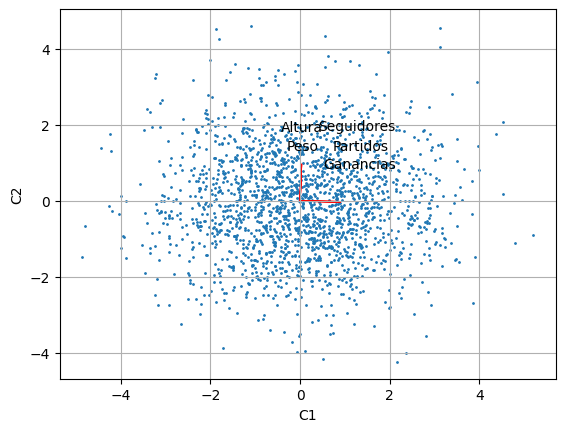

In [19]:
# Biplot

# Importar librerias
import matplotlib.pyplot as plt

# Definir una función que devuelve un biplot
# La función tiene como parámetros Y, correlaciones XY, nombre de las variables
def biplot(y,c,variables):

    d = c.shape[0]
    plt.scatter(y[:, 0], y[:, 1], s=1)
    for i in range(d):
        plt.arrow(0, 0, c[i,0], c[i,1],color = 'r')
        plt.text(c[i,0]* 1.5, c[i,1] * 1.5+i*.5, variables[i],
                 color = 'black', ha = 'center', va = 'center')

    plt.xlabel("C1")
    plt.ylabel("C2")
    plt.grid()


# Llamar la función y pasarle los parámetros
biplot(Y,corr,variables)


# Analisis Factorial, FA con sklearn

In [36]:
# Hacer un análsis de componentes principales

from sklearn.decomposition import FactorAnalysis

# Instanciar el modelo y ajustar los datos
fa = FactorAnalysis(n_components=2, random_state=0)


puntuaciones = fa.fit_transform(X_std)
cargas = fa.components_
varianza_errores = fa.noise_variance_


In [37]:
# Imprimir las puntuaciones (scores)
print(puntuaciones)

[[ 9.98920431e-01 -7.41930580e-05]
 [-4.21524940e-01  1.62809073e+00]
 [-2.68890266e-01 -3.37586820e-01]
 ...
 [-1.03140445e+00  6.12850221e-01]
 [-1.25150680e+00 -7.35999031e-01]
 [-6.76186154e-01 -1.73778062e+00]]


In [38]:
# Imprimir las cargas
print(cargas)

[[ 0.92965591  0.92962189  0.01419208  0.00503815  0.01098732]
 [-0.00417642 -0.00614106  0.81678671  0.87794309  0.72113862]]


In [39]:
# imprimir las varianzas de los errores
print(varianza_errores)


[0.13572441 0.13576511 0.33231338 0.22968843 0.47972598]


In [51]:
# Calcular las comunalidades
comunalidades = np.sum(cargas**2, axis=0)
print("Comunalidades:\n", comunalidades)


Comunalidades:
 [0.86427755 0.86423458 0.66734195 0.77080944 0.52016163]


In [54]:
# Comprobar que 1 = comunalidades + varianza_errores
comunalidades + varianza_errores

array([1.00000195, 0.99999968, 0.99965533, 1.00049788, 0.99988761])

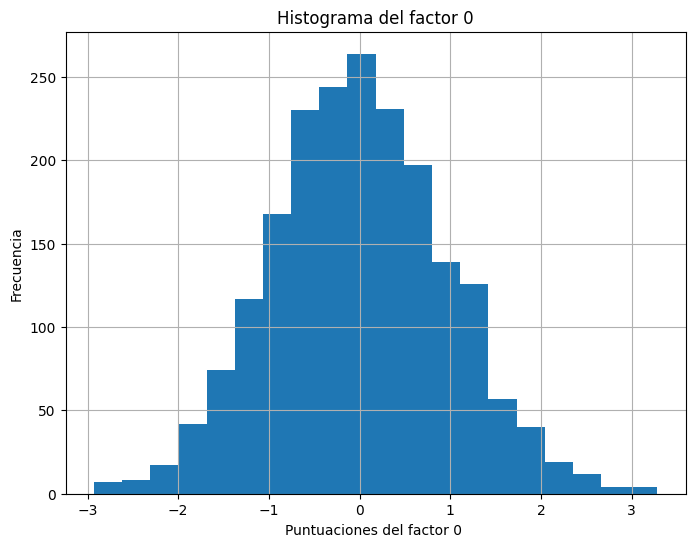

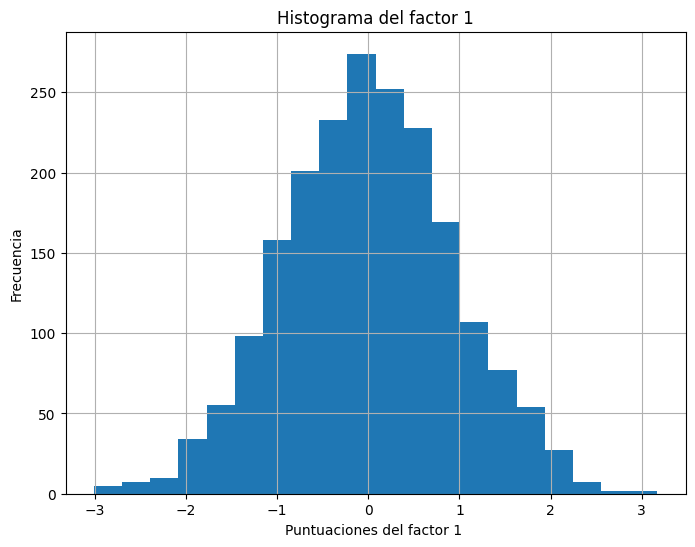

In [40]:
# Analizar las puntuaciones
import matplotlib.pyplot as plt

df_puntuaciones = pd.DataFrame(puntuaciones)

# Hacer un histograma de cada factor
for col in df_puntuaciones.columns:
    plt.figure(figsize=(8, 6))  # Definir el tamaño del gráfico
    plt.hist(X_fa[col], bins=20)  # Definir el número de intervalos
    plt.title(f'Histograma del factor {col}')
    plt.xlabel(f'Puntuaciones del factor {col} ')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


In [42]:
# Calcular media y covarianzas de df_puntuaciones

# Calcular las medias
medias = df_puntuaciones.mean()
print("Medias:\n", medias)

# Calcular las covariazas
covarianzas = df_puntuaciones.cov()
print("\nCovarianzas:\n", covarianzas)


Medias:
 0   -2.003953e-17
1    4.474199e-17
dtype: float64

Covarianzas:
               0             1
0  9.276524e-01 -2.587669e-15
1 -2.587669e-15  8.661650e-01
